In [21]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def extract_spectrogram(wav_file):
    # Load audio file
    y, sr = librosa.load(wav_file)

    # Compute Short-Time Fourier Transform (STFT)
    D = librosa.stft(y)

    # Convert to decibels
    S_db = librosa.amplitude_to_db(abs(D))
    
    # Resize the spectrogram to 256x256
    S_dB_resized = librosa.util.fix_length(S_db, size=256, axis=1)
    
    return S_db

# Example usage
spectrogram = extract_spectrogram(r'C:\Users\Nutzer\Documents\Uni\ProjectMedicalWearables\Database\snippet_wavs\participant01\session01\chewing_apple_90.350_91.350.wav')
# Save the 256x256 spectrogram as a numpy file
print(spectrogram.shape)
np.save('spectrogram_256x256.npy', spectrogram)

(1025, 44)


(257, 257)


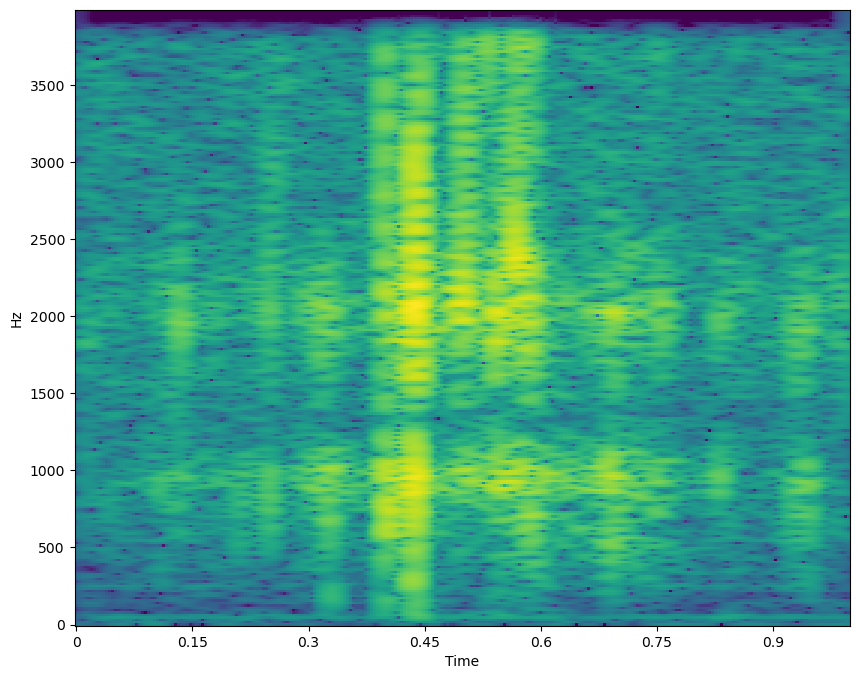

In [47]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the audio file
file_path = r'C:\Users\Nutzer\Documents\Uni\ProjectMedicalWearables\Database\snippet_wavs\participant01\session01\swallowing_bread_152.602_153.602.wav'
audio_data, sample_rate = librosa.load(file_path, sr=7960) #loading and resampling to 8000Hz

# Apply a highpass filter with a cutoff frequency of 40Hz
audio_data = librosa.effects.preemphasis(audio_data, coef=0.97)

# Parameters
fft_size = 512  # Number of frequency bins
hop_length = 31
# STFT with squared parameters
S = librosa.stft(audio_data, n_fft=fft_size, hop_length=hop_length ,window='hann')
S_dB = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# Step 5: Plot the spectrogram
plt.figure(figsize=(10, 8))
librosa.display.specshow(
    S_dB, 
    sr=sample_rate, 
    hop_length=hop_length, 
    x_axis='time', 
    y_axis='hz', 
    cmap='viridis'
)

print(S_dB.shape)
